In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing Price data set.csv")
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

# Removing Catogorical features

In [5]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [6]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [7]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [8]:
std

lotsize     2168.158725
bedrooms       0.737388
bathrms        0.502158
stories        0.868203
garagepl       0.861307
dtype: float64

In [9]:
mean

lotsize     5150.265568
bedrooms       2.965201
bathrms        1.285714
stories        1.807692
garagepl       0.692308
dtype: float64

In [10]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [11]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]

In [12]:
x1 = x
testx = x[383:]
testy = price[383:]
X = x[:383]
Y = price[:383]

In [13]:
def cost(x, y, w):
    m = len(y)
    return np.sum((np.dot(x, w) - y) ** 2) / (2 * m)    

In [14]:
alpha = 0.001
iterations = 10000
y = price

In [15]:
def gradient_descend(x, y, alpha, iterations):
    m = len(y)
    cost_list = []
    w = np.zeros((6,1))

    for i in range(iterations):
        grade = np.dot((np.dot(x,w) - y).T,x).T / m
        w = w - alpha * grade
        cost_list.append(cost(x, y, w))
    return cost_list, w

def rms_error(x, y, w):
    h = np.dot(x, w)
    e = np.dot((h - y).T,(h - y)) / len(y)
    return np.sqrt(e[0][0])

def avg_per_error(x, y, w):
    e = np.abs(np.dot(1/y.T,np.abs(np.dot(x, w) - y)))
    return ((e)[0][0] * 100) / len(y)

# Normal equation

In [16]:
def normal_eq(x,y):
    X = np.array(x1)
    return np.matmul(np.linalg.inv(np.matmul(X.T,X)), np.matmul(X.T,y))    

In [17]:
w = normal_eq(x1,y)
print("Normal equation\nWeight Matrix")
print(w)

Normal equation
Weight Matrix
[[68121.5970696 ]
 [10262.83884612]
 [ 1761.24197942]
 [ 8108.87550802]
 [ 6840.95047737]
 [ 4626.89856312]]


# Gradient descent

alpha = 0.1 
no of iterations = 150
[[68121.58774433]
 [10262.73668589]
 [ 1761.72863138]
 [ 8108.72025601]
 [ 6840.61642385]
 [ 4626.94776524]]


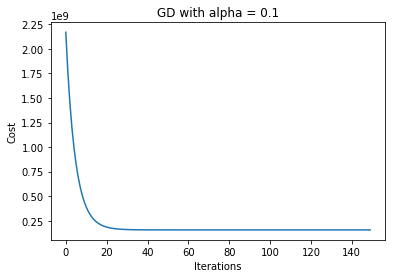

In [18]:
cost_list, w = gradient_descend(x1, y, alpha=0.1, iterations=150)

print("alpha = {} \nno of iterations = {}".format(0.1, 150))
print(w)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 0.1")
plt.plot(cost_list)
#print(cost_list[-1])

alpha = 0.003 
no of iterations = 4500
[[68121.50555356]
 [10262.44534057]
 [ 1762.75079506]
 [ 8108.37736525]
 [ 6839.9346056 ]
 [ 4627.13236311]]


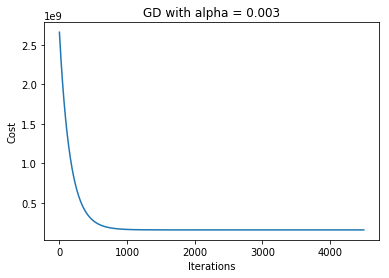

In [19]:
cost_list, w = gradient_descend(x1, y, alpha=0.003, iterations=4500)

print("alpha = {} \nno of iterations = {}".format(0.003, 4500))
print(w)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 0.003")
plt.plot(cost_list)


alpha = 0.01 
no of iterations = 1500
[[68121.5777465 ]
 [10262.69826337]
 [ 1761.86009808]
 [ 8108.67592526]
 [ 6840.52898447]
 [ 4626.97253576]]


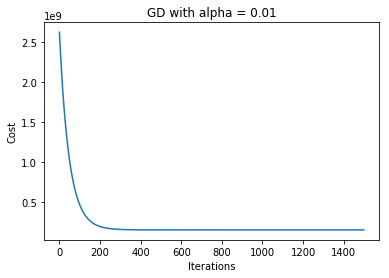

In [20]:
cost_list, w = gradient_descend(x, y, alpha=0.01, iterations=1500)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 0.01")
plt.plot(cost_list)
#print(cost_list[-1])
print("alpha = {} \nno of iterations = {}".format(0.01, 1500))
print(w)

alpha = 0.03 
no of iterations = 450
[[68121.52111305]
 [10262.47643006]
 [ 1762.65898923]
 [ 8108.40916137]
 [ 6839.99460656]
 [ 4627.11064477]]


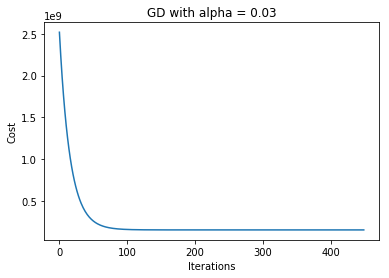

In [21]:
cost_list, w = gradient_descend(x, y, alpha=0.03, iterations=450)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 0.03")
plt.plot(cost_list)
print("alpha = {} \nno of iterations = {}".format(0.03, 450))
print(w)

alpha = 3 
no of iterations = 5
[[ 2248012.7032967 ]
 [12418046.89963444]
 [17233311.63861952]
 [17054814.8619864 ]
 [15098979.54792881]
 [11562667.08447915]]


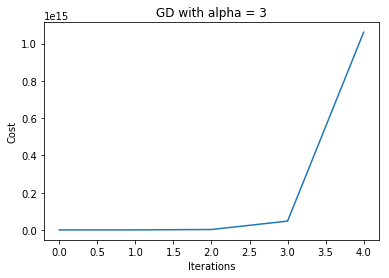

In [22]:
cost_list, w = gradient_descend(x, y, alpha=3, iterations=5)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 3")
plt.plot(cost_list)
print("alpha = {} \nno of iterations = {}".format(3, 5))
print(w)

alpha = 1 
no of iterations = 15
[[68121.5970696 ]
 [11691.93330197]
 [ 3806.94388708]
 [10124.23340676]
 [ 8642.91357686]
 [ 5954.05374255]]


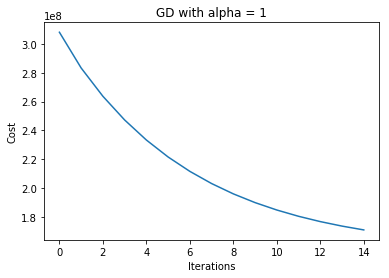

In [23]:
cost_list, w = gradient_descend(x, y, alpha=1, iterations=15)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 1")
plt.plot(cost_list)
print("alpha = {} \nno of iterations = {}".format(1, 15))
print(w)

alpha = 0.3 
no of iterations = 40
[[68121.5536979 ]
 [10262.4104949 ]
 [ 1763.06059034]
 [ 8108.28441931]
 [ 6839.71459948]
 [ 4627.13222429]]


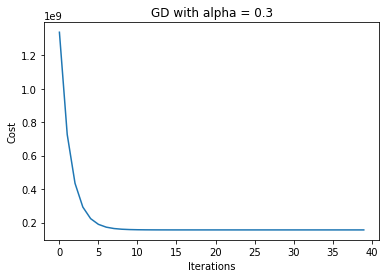

In [24]:
cost_list, w = gradient_descend(x, y, alpha=0.3, iterations=40)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("GD with alpha = 0.3")
plt.plot(cost_list)
print("alpha = {} \nno of iterations = {}".format(0.3, 40))
print(w)

# Without normalisation

price    1.792482e+79
dtype: float64
[[-1.07162504e+36]
 [-5.32556160e+32]
 [-2.34541053e+32]
 [-3.24990869e+32]
 [-1.44977093e+32]
 [-1.76796579e+32]]


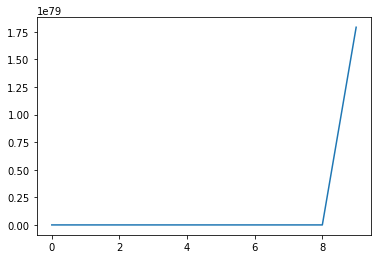

In [25]:
data['bias'] = np.ones(normalized_data.shape[0])
cost_list, w = gradient_descend(data, y, alpha=0.0001, iterations=10)
plt.plot(cost_list)
print(cost_list[-1])
print(w)

In [26]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [27]:
rms_error(x,y,w)

1.0716254257953025e+36

In [28]:
print("Average error = ",avg_per_error(x,y,w),"%");

Average error =  1.8052939091139757e+33 %
